# <center>Método de Euler Explicito</center>

\begin{equation}
\frac{u_j^{n+1} - u_j^{n}}{\Delta t} + c \frac{u_{j+1}^{n} - u_j^n}{\Delta x} = 0 \
\end{equation}

\begin{equation}
\frac{u_j^{n+1} - u_j^{n}}{\Delta t} + c \frac{u_{j+1}^{n} - u_{j-1}^n}{2\Delta x} = 0 \
\end{equation}

Os erros de truncamento (TEs) têm ordens $O[\Delta t, \Delta x]$ e $O[\Delta t, (\Delta x)^2]$, respectivamente. Referimo-nos a esses esquemas como sendo precisos de primeira ordem, uma vez que o termo de ordem mais baixa no TE é de primeira ordem, ou seja, $\Delta t$ e $\Delta x$ para a Equação 4.5 e $\Delta t$ para a Equação 4.6. Esses esquemas são explícitos, pois apenas uma incógnita $u_j^{n+1}$ aparece em cada equação. Infelizmente, quando a análise de estabilidade de von Neumann é aplicada a esses esquemas, descobrimos que eles são incondicionalmente instáveis. Esses esquemas simples, portanto, mostram ser inúteis na resolução da equação de onda. Vamos agora analisar métodos que têm mais utilidade.

Isolando a variável desconhecida em

\begin{equation}
\frac{{u_{j}^{n+1} - u_{j}^{n}}}{{\Delta t}} + c\frac{{u_{j+1}^{n} - u_{j-1}^{n}}}{{2\Delta x}} = 0 \quad
\tag{4.6}
\end{equation}

temos

\begin{equation}
{u_{j}^{n+1} = u_{j}^{n}} - c\frac{\Delta t}{2\Delta x}\left(u_{j+1}^{n} - u_{j-1}^{n}\right) \quad
\end{equation}

tomando $v = c\frac{\Delta t}{\Delta x}$

\begin{equation}
u_{j}^{n+1} = u_{j}^{n} - \frac{v}{2}\left(u_{j+1}^{n} - u_{j-1}^{n}\right)
\end{equation}

Isolando a variável desconhecida em

\begin{equation}
\frac{{u_{j}^{n+1} - u_{j}^{n}}}{{\Delta t}} + c\frac{{u_{j+1}^{n} - u_{j}^{n}}}{{\Delta x}} = 0 \quad c > 0 
\tag{4.5}
\end{equation}

tomando $v = c\frac{\Delta t}{\Delta x}$

\begin{equation}
u_{j}^{n+1} = u_{j}^{n} - v\left(u_{j+1}^{n} - u_{j}^{n}\right)
\end{equation}

# Questão 5 da lista 4. 

Resolva, numericamente, a equação da onda:

\begin{equation}
u_t + u_x = 0, \quad 0 \leq x \leq L
\end{equation}

Submetida à condição inicial:

\begin{equation}
u(x, 0) = \sin\left(\frac{2n\pi x}{L}\right)
\end{equation}

e às **condições de contorno periódicas**, utilizando os seguintes esquemas de diferenças finitas:

1. ~~Upstream~~
2. ~~Lax~~
3. ~~Leap Frog~~
4. ~~Lax-Wendroff~~
5. ~~MacCormack~~
6. ~~Lax-Wendroff de 2 passos~~
7. ~~Upwind de 2ª Ordem~~
8. ~~Trapezoidal (Time Centered Implicit)~~
9. ~~Warming-Kutler-Lomax~~
10. ~~Rusanov ($\omega = 3$)~~
11. **Euler Explícito**

Escolha uma malha com 41 pontos e $\Delta x = 1$ (logo,  $L = 40$) e calcule para  $t = 18.$ Resolva este problema para  $n = 3$ e $\nu = 1$, $\nu = 0.6$ e $\nu = 0.3$ e compare graficamente com a solução exata.


Determine $\beta$  para  $n = 3$ e calcule os erros na amplitude e na fase para o esquema com $\nu = 0.6$.
Compare estes erros com os que aparecem nos gráficos.


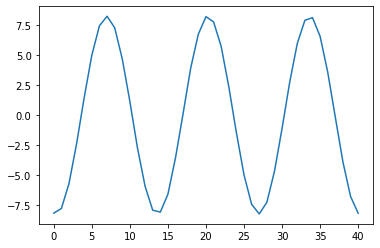

In [28]:
# importes
import numpy as np
import matplotlib.pyplot as plt

# dados iniciais
l = 40
delta_x = 1
num_pontos = 41
t_final = 18
c = 1
delta_t = 0.1 
n = 3
x = np.arange(0, num_pontos, delta_x)
t = np.arange(0, t_final, delta_t)
num_tempo = len(t)
'''
    criando uma matriz para conter todas as soluções, onde a linha é o tempo
    e as colunas é cada ponto do domínio.
'''
u_num = np.zeros((num_tempo, num_pontos))

# definindo a condição inicial na linha 0
u_num[0, :] = np.sin(2 * n * np.pi * x / l)

# definindo o valor de v
v = (delta_t / delta_x) * c

# solução numérica. o indice i percorre as linhas, equanto o j percorre as colunas

for i in range(1, num_tempo - 1):
    for j in range(0, num_pontos - 1):
        u_num[i, j] = u_num[i - 1, j] - v * (u_num[i - 1, j + 1] - u_num[i - 1, j])
    u_num[i, num_pontos - 1] = u_num[i, 0]
plt.plot(u_num[i,:])
    #plt.show()
    # print(u_num[i, j + 1])